# Agglomerative Hierarchical

In [1]:
import math
import random

import numpy as np
from scipy.spatial.distance import cdist

In [13]:
class AgglomerativeHierarchical(object):
    
    def __init__(self, n_clusters, linkage='single'):
        self.n_clusters = n_clusters
        self.clusters = []
        self.labels = []
        if linkage == 'single':
            self.linkage = self.single_linkage
        elif linkage == 'complete':
            self.linkage = self.complete_linkage
        elif linkage == 'average':
            self.linkage = self.average_linkage
        elif linkage == 'average-group':
            self.linkage = self.average_group_linkage
        else: # not the listed linkage
            raise Exception('wrong linkage type')
            
    
    def single_linkage(self, cluster1, cluster2):
        distances = cdist(cluster1, cluster2, 'euclidean')
        
        return distances.min()
        
    
    def complete_linkage(self, cluster1, cluster2):
        distances = cdist(cluster1, cluster2, 'euclidean')
        
        return distances.max()
        
        
    def average_linkage(self, cluster1, cluster2):
        distances = cdist(cluster1, cluster2, 'euclidean')
        
        return distances.mean()
        
        
    def average_group_linkage(self, cluster1, cluster2):
        mean1 = np.array(cluster1).mean(axis=0)
        mean2 = np.array(cluster2).mean(axis=0)
        
        return self.euclidean_distance(mean1, mean2)
    
    
    def euclidean_distance(self, p1, p2):
        return sum((p1 - p2) ** 2) ** (1/2)
    
    
    def initiate_clusters(self, X):
        return [[x] for x in X]
    
    
    def count_clusters_distances(self, clusters):
        clusters_distances = np.zeros(shape=(len(clusters), len(clusters)))
        
        for i, cluster1 in enumerate(clusters):
            for j, cluster2 in enumerate(clusters):
                if i == j:
                    clusters_distances[i][j] = np.inf
                else: # i != j
                    clusters_distances[i][j] = self.linkage(cluster1, cluster2)
        
        return clusters_distances
        
    
    def find_clusters_to_merge(self, clusters_distances):
        closest_clusters = np.argmin(clusters_distances, axis=0)
        closest_clusters = [(i, closest_cluster, clusters_distances[i][closest_cluster])
                             for i, closest_cluster in enumerate(closest_clusters)]
        
        closest_clusters.sort(key = lambda closest_clusters: closest_clusters[2])
        
        return closest_clusters

    
    def update_clusters(self, clusters, closest_clusters):
        new_clusters = []
        merged_clusters = []
        for closest_cluster in closest_clusters:
            if closest_cluster[0] in merged_clusters or closest_cluster[1] in merged_clusters:
                continue
            else:
                new_clusters.append(clusters[closest_cluster[0]] + clusters[closest_cluster[1]])
                merged_clusters.append(closest_cluster[0])
                merged_clusters.append(closest_cluster[1])
        
        merged_clusters.sort(reverse=True)
        for to_remove in merged_clusters:
            del clusters[to_remove]
        
        return clusters + new_clusters
    
    
    def fit(self, X):
        clusters = self.initiate_clusters(X)
        current_n_clusters = len(X)
        while current_n_clusters > self.n_clusters:
            clusters_distances = self.count_clusters_distances(clusters)
            closest_clusters = self.find_clusters_to_merge(clusters_distances)
            clusters = self.update_clusters(clusters, closest_clusters)
            current_n_clusters = len(clusters)
            
        self.clusters = clusters
        self.create_label(X)
        
    
    def create_label(self, X):
        label = np.full((len(X)), -1)
        for i, data in enumerate(X):
            for j, c in enumerate(self.clusters):
                if (data in c):
                    label[i] = j
                        
        self.labels = label

## Comparison with SKLearn

In [14]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data  # we only take the first two features.
X = X.tolist()
y = iris.target

In [15]:
clf_single = AgglomerativeHierarchical(3, 'single')
clf_single.fit(X)
clf_single.labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [16]:
from sklearn.cluster import AgglomerativeClustering as SKLearnAgglomerativeClustering

clf_sklearn_single = SKLearnAgglomerativeClustering(3, linkage='single').fit(X)
clf_sklearn_single.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [17]:
clf_complete = AgglomerativeHierarchical(3, 'complete')
clf_complete.fit(X)
clf_complete.labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [18]:
clf_sklearn_complete = SKLearnAgglomerativeClustering(3, linkage='complete').fit(X)
clf_sklearn_complete.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [20]:
clf_average = AgglomerativeHierarchical(3, 'average')
clf_average.fit(X)
clf_average.labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0,
       2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2])

In [21]:
clf_sklearn_average = SKLearnAgglomerativeClustering(3, linkage='average').fit(X)
clf_sklearn_average.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

In [22]:
from scipy.stats import mode

def replace_labels(pred_labels):
    dict_replace = {
        mode(pred_labels[:50]).mode[0]: 0,
        mode(pred_labels[50:100]).mode[0]: 1,
        mode(pred_labels[100:]).mode[0]: 2
    }
    pred_labels = np.array([dict_replace[label] for label in pred_labels])
    
    return pred_labels

In [30]:
dict_replace = {
    1: 0,
    2: 1,
    0: 2
}
clf_single_labels = np.array([dict_replace[label] for label in clf_single.labels])

dict_replace = {
    1: 0,
    0: 1,
    2: 2
}
clf_sklearn_single_labels = np.array([dict_replace[label] for label in clf_sklearn_single.labels_])
print('total same cluster with sklearn (single-linkage):', np.sum(clf_single_labels == clf_sklearn_single_labels), 'of 150')

total same cluster with sklearn (single-linkage): 147 of 150


In [32]:
clf_complete_labels = replace_labels(clf_complete.labels)
clf_sklearn_complete_labels = replace_labels(clf_sklearn_complete.labels_)
print('total same cluster with sklearn (complete-linkage):', np.sum(clf_complete_labels == clf_sklearn_complete_labels), 'of 150')

total same cluster with sklearn (complete-linkage): 128 of 150


In [34]:
dict_replace = {
    1: 0,
    2: 1,
    0: 2
}
clf_average_labels = np.array([dict_replace[label] for label in clf_average.labels])

dict_replace = {
    1: 0,
    0: 1,
    2: 2
}
clf_sklearn_average_labels = np.array([dict_replace[label] for label in clf_sklearn_average.labels_])
print('total same cluster with sklearn (average-linkage):', np.sum(clf_average_labels == clf_sklearn_average_labels), 'of 150')

total same cluster with sklearn (average-linkage): 135 of 150


## Accuracy based on True Label

In [35]:
from sklearn.metrics import accuracy_score

In [39]:
print('single-linkage:')
print('created model accuracy: {0:.2f}%'.format(accuracy_score(clf_single_labels, y)*100))
print('sklearn model accuracy: {0:.2f}%'.format(accuracy_score(clf_sklearn_single_labels, y)*100))

single-linkage:
created model accuracy: 67.33%
sklearn model accuracy: 68.00%


In [40]:
print('complete-linkage:')
print('created model accuracy: {0:.2f}%'.format(accuracy_score(clf_complete_labels, y)*100))
print('sklearn model accuracy: {0:.2f}%'.format(accuracy_score(clf_sklearn_complete_labels, y)*100))

complete-linkage:
created model accuracy: 97.33%
sklearn model accuracy: 84.00%


In [41]:
print('average-linkage:')
print('created model accuracy: {0:.2f}%'.format(accuracy_score(clf_average_labels, y)*100))
print('sklearn model accuracy: {0:.2f}%'.format(accuracy_score(clf_sklearn_average_labels, y)*100))

average-linkage:
created model accuracy: 80.67%
sklearn model accuracy: 90.67%


## Visualization 

In [42]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'True Label')

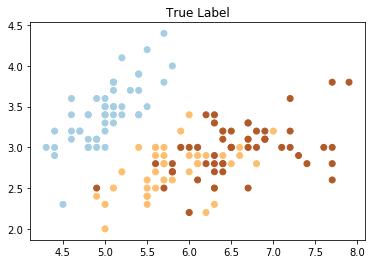

In [44]:
X = np.array(X)
plt.scatter(X[:,0], X[:,1], c=y, cmap='Paired')
plt.title("True Label")

Text(0.5, 1.0, 'Created AHC (Single-Linkage)')

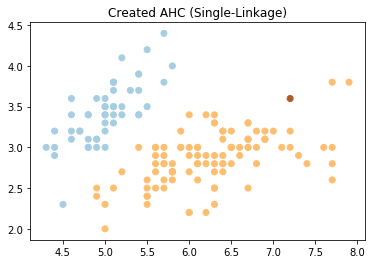

In [46]:
plt.scatter(X[:,0], X[:,1], c=clf_single_labels, cmap='Paired')
plt.title("Created AHC (Single-Linkage)")

Text(0.5, 1.0, 'SKLearn AHC (Single-Linkage)')

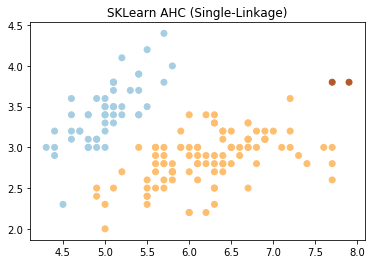

In [47]:
plt.scatter(X[:,0], X[:,1], c=clf_sklearn_single_labels, cmap='Paired')
plt.title("SKLearn AHC (Single-Linkage)")

Text(0.5, 1.0, 'Created AHC (Complete-Linkage)')

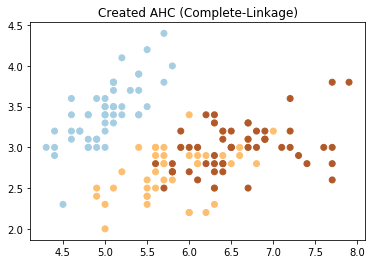

In [48]:
plt.scatter(X[:,0], X[:,1], c=clf_complete_labels, cmap='Paired')
plt.title("Created AHC (Complete-Linkage)")

Text(0.5, 1.0, 'SKLearn AHC (Complete-Linkage)')

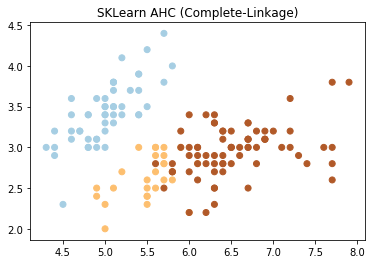

In [49]:
plt.scatter(X[:,0], X[:,1], c=clf_sklearn_complete_labels, cmap='Paired')
plt.title("SKLearn AHC (Complete-Linkage)")

Text(0.5, 1.0, 'Created AHC (Average-Linkage)')

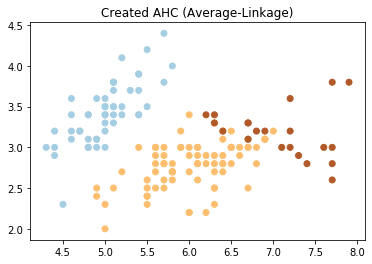

In [50]:
plt.scatter(X[:,0], X[:,1], c=clf_average_labels, cmap='Paired')
plt.title("Created AHC (Average-Linkage)")

Text(0.5, 1.0, 'SKLearn AHC (Average-Linkage)')

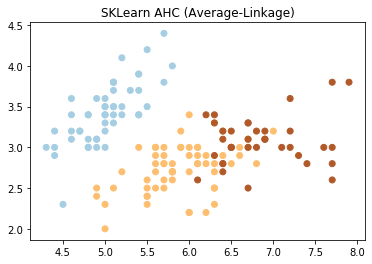

In [51]:
plt.scatter(X[:,0], X[:,1], c=clf_sklearn_average_labels, cmap='Paired')
plt.title("SKLearn AHC (Average-Linkage)")